In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#폐교율 데이터 불러오기
cs_all = pd.read_excel('./cs_all.xlsx', index_col =0)
#학령인구 데이터 불러오기
region_all = pd.read_excel('./region_all.xlsx', index_col =0)

In [3]:
#필요없는 컬럼 제거 (폐교율)
cs_all = cs_all.drop(['폐교년도'], axis =1)

In [4]:
#컬럼명 변경
cs_all = cs_all.rename(columns={'폐교 수' : 'Closed School'})

In [5]:
#필요없는 컬럼 제거 (학령인구)
region_all = region_all.drop(['시점'], axis =1)

In [6]:
#시점 동일 (2001 ~ 2020)
region_all = region_all.iloc[0:20]

In [7]:
#컬럼명 변경
region_all = region_all.rename(columns={'ele' : 'Elementary', 'mid' : 'Middle', 'hig' : 'High', 'all' : 'All'})

# 2001 ~ 2020 상관관계

In [8]:
#일부 데이터 결합
corr_20012020 = pd.concat([region_all, cs_all], axis =1)

In [9]:
#공분산 분석 (cov)
corr_20012020.cov()

,Elementary,Middle,High,All,Closed School
Elementary,365868.450000,123361.344737,43807.455263,533037.250000,-3270.823684
Middle,123361.344737,77132.028947,43421.350000,243914.723684,-1112.086842
High,43807.455263,43421.350000,39953.313158,127182.118421,-203.576316
All,533037.250000,243914.723684,127182.118421,904134.092105,-4586.486842
Closed School,-3270.823684,-1112.086842,-203.576316,-4586.486842,98.260526


In [10]:
#상관분석 실행 (corr)
cor_reg_clo = corr_20012020.corr(method='pearson')

In [11]:
corr = cor_reg_clo.corr()

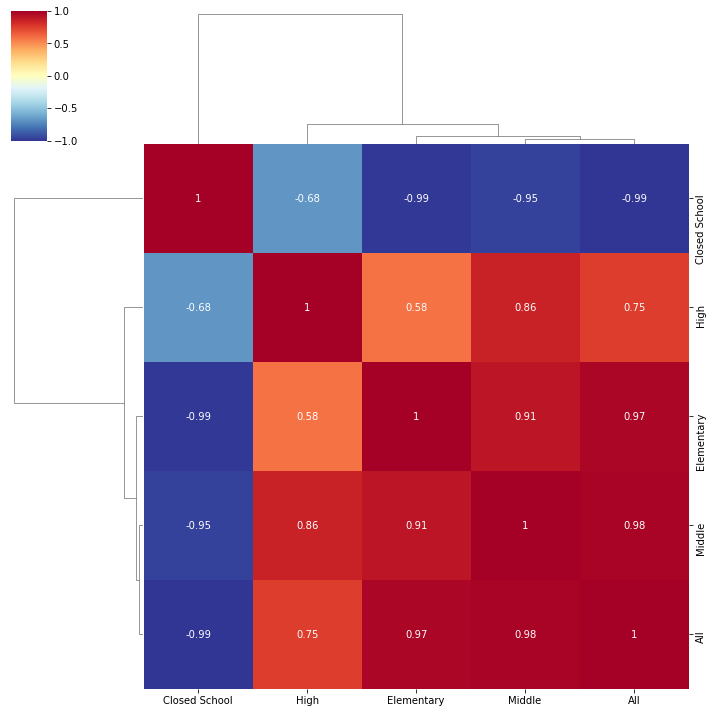

In [12]:
#상관분석 시각화(clustermap)
sns.clustermap(corr, annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1)

<AxesSubplot:>

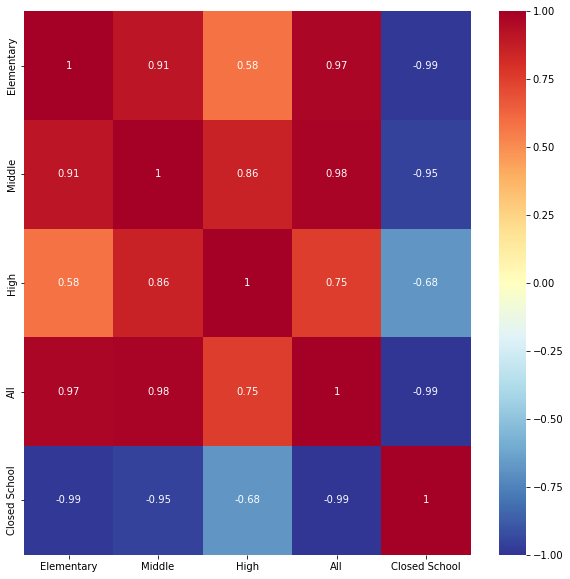

In [13]:
#상관분석 시각화(heatmap)
plt.figure(figsize = (10, 10))

sns.heatmap(corr, annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1)

# 2011 ~ 2020 상관관계

## 2010년부터 학령인구가 급격하게 줄어들어 2011 ~ 2020년 상관관계 추가 분석

In [14]:
#년도 지정
corr_20112020 = corr_20012020.iloc[10:]

In [15]:
#상관분석 실행
cor_reg_clo_2 = corr_20112020.corr(method='pearson')

In [16]:
corr_2 = cor_reg_clo_2.corr()

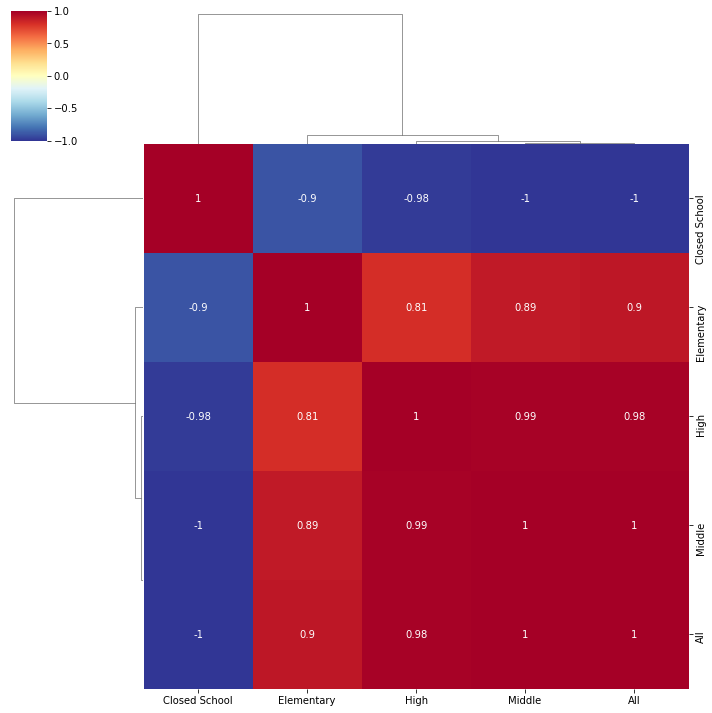

In [17]:
#상관분석 시각화(clustermap)
sns.clustermap(corr_2, annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1)

<AxesSubplot:>

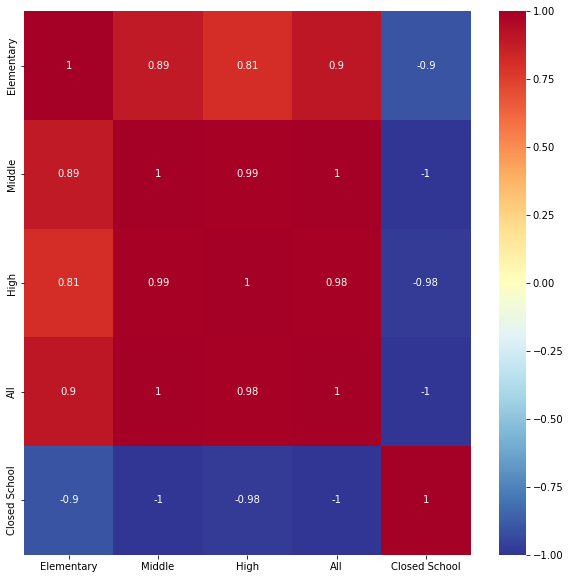

In [18]:
#상관분석 시각화(heatmap)_1
plt.figure(figsize = (10, 10))

sns.heatmap(corr_2, annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1)